In [1]:
! pip install mnist

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import mnist

In [3]:
train_images_1 = mnist.train_images()
train_labels_1 = mnist.train_labels()

test_images_1 = mnist.test_images()
test_labels_1 = mnist.test_labels()

In [4]:
train_images = np.expand_dims(train_images_1, axis = -1)
test_images = np.expand_dims(test_images_1, axis = -1)

In [5]:
train_labels = tf.keras.utils.to_categorical(train_labels_1)
test_labels = tf.keras.utils.to_categorical(test_labels_1)

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


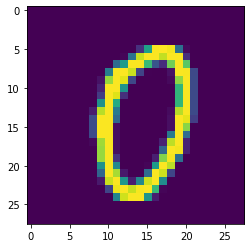

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


In [7]:
plt.imshow(train_images_1[1000])
plt.show()
print(train_labels[1000])
print(train_labels_1[1000])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = 'SAME'))
classifier.add(Dropout(0.4))

classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = 'SAME'))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 10, activation = 'softmax', kernel_initializer='random_normal'))

In [9]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

In [10]:
classifier.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [12]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint('MNIST_digit.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()]

In [13]:
classifier.fit(train_images, train_labels, batch_size=64, epochs=100, verbose=1, validation_data = (test_images, test_labels), callbacks = callbacks)

Epoch 1/100
938/938 [==============================] - 5s 5ms/step - loss: 0.4214 - accuracy: 0.8720 - val_loss: 0.0492 - val_accuracy: 0.9843
Epoch 2/100
938/938 [==============================] - 4s 5ms/step - loss: 0.1157 - accuracy: 0.9650 - val_loss: 0.0426 - val_accuracy: 0.9851
Epoch 3/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0927 - accuracy: 0.9725 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 4/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0759 - accuracy: 0.9778 - val_loss: 0.0213 - val_accuracy: 0.9926
Epoch 5/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0712 - accuracy: 0.9798 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 6/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0635 - accuracy: 0.9810 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 7/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0313 - val_accuracy: 0.9909

In [14]:
MNIST_model = tf.keras.models.load_model('MNIST_digit.h5')

In [15]:
img = train_images[1010]
image = np.expand_dims(img, axis = 0)

In [16]:
prediction = MNIST_model.predict_classes(image)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
prediction[0]

2

In [18]:
# saving the model
# serialize model to JSON
model_json = MNIST_model.to_json()
with open("model_json.json", "w") as json_file:
  json_file.write(model_json)
# serialize weights ro HDF5
MNIST_model.save_weights("model_weights.h5")